In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()

## Spam/Ham Classification
## Feature Engineering, Logistic Regression, Cross Validation



In this project, I create a classifier that can distinguish spam (junk or commercial or bulk) emails from ham (non-spam) emails.

This project highlights the following skills:

- Feature engineering with text data
- Using sklearn libraries to process data and fit models
- Validating the performance of our model and minimizing overfitting
- Generating and analyzing precision-recall curves


# Part I - Initial Analysis

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid",
        color_codes = True,
        font_scale = 1.5)

### Loading in the Data

In email classification, our goal is to classify emails as spam or not spam (referred to as "ham") using features generated from the text in the email.

The dataset consists of email messages and their labels (0 for ham, 1 for spam). Our labeled training dataset contains 8348 labeled examples, and the test set contains 1000 unlabeled examples.

The `train` DataFrame contains labeled data that we will use to train our model. It contains four columns:

1. `id`: An identifier for the training example
1. `subject`: The subject of the email
1. `email`: The text of the email
1. `spam`: 1 if the email is spam, 0 if the email is ham (not spam)

The `test` DataFrame contains 1000 unlabeled emails. We will predict labels for these emails and submit our predictions to the autograder for evaluation.

In [ ]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

Using version already downloaded: Sat Aug  1 16:54:36 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Sat Aug  1 16:54:37 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


### Question 1a
First, let's check if our data contains any missing values. Fill in the cell below to print the number of NaN values in each column. If there are NaN values, replace them with appropriate filler values (i.e., NaN values in the `subject` or `email` columns should be replaced with empty strings). Print the number of NaN values in each column after this modification to verify that there are no NaN values left.

Note that while there are no NaN values in the `spam` column, we should be careful when replacing NaN labels. Doing so without consideration may introduce significant bias into our model when fitting.

*The provided test checks that there are no missing values in our dataset.*

<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [ ]:
original_training_data = original_training_data.fillna('')
print(np.sum(original_training_data.isnull(), axis=0))

id         0
subject    0
email      0
spam       0
dtype: int64


In [ ]:
grader.check("q1a")

All tests passed!

In [ ]:
original_training_data

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0
...,...,...,...,...
8343,8343,Subject: Re: ALSA (almost) made easy\n,"thanks for this, i'm going to give them anothe...",0
8344,8344,Subject: Re: Goodbye Global Warming\n,thanks for the link - i'm fascinated by archae...,0
8345,8345,Subject: hello\n,we need help. we are a 14 year old fortune 50...,1
8346,8346,Subject: Your application is below. Expires Ju...,<html>\n \n \n <head> \n <meta charset=3dutf-8...,1


In [ ]:
first_ham = original_training_data.iloc[0, 2]
first_spam = original_training_data.iloc[2, 2]
print(first_ham)
print(first_spam)

url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
 
 



In [ ]:
grader.check("q1b")

All tests passed!

<!-- BEGIN QUESTION -->

### Question 1c

One thing we notice that is different between the two emails that might relate to the identification of spam:

<!--
BEGIN QUESTION
name: q1c
manual: True
points: 2
-->

The ham email seems more personalized since it includes a name as well, whereas the spam email seems to contain a template consisting of texts like \<\\html\>,\<\\head\> etc. It also seems to use very general wording.

<!-- END QUESTION -->



## Training Validation Split
The training data we downloaded is all the data we have available for both training models and **validating** the models that we train.  We therefore need to split the training data into separate training and validation datsets.  We will need this **validation data** to assess the performance of our classifier once we are finished training. Note that we set the seed (random_state) to 42. This will produce a pseudo-random sequence of random numbers that is the same for every student.

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

# Basic Feature Engineering

We would like to take the text of an email and predict whether the email is ham or spam. This is a *classification* problem, so we can use logistic regression to train a classifier. To train an logistic regression model we need a numeric feature matrix $X$ and a vector of corresponding binary labels $y$.  Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is an email. Each column of $X$ contains one feature for all the emails.

### Question 2

We will create a function called `words_in_texts` that takes in a list of `words` and a pandas Series of email `texts`. It should output a 2-dimensional NumPy array containing one row for each email text. The row should contain either a 0 or a 1 for each word in the list: 0 if the word doesn't appear in the text and 1 if the word does. For example:

```
>>> words_in_texts(['hello', 'bye', 'world'],
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])
```


<!--
BEGIN QUESTION
name: q2
points: 3
-->

In [ ]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in

    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = np.array([texts.str.contains(h, regex=False)*1 for h in words]).T
    return indicator_array

words_in_texts(['hello', 'bye', 'world'],
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])

In [ ]:
grader.check("q2")

All tests passed!

# Basic EDA

We need to identify some features that allow us to distinguish spam emails from ham emails. One idea is to compare the distribution of a single feature in spam emails to the distribution of the same feature in ham emails. If the feature is itself a binary indicator, such as whether a certain word occurs in the text, this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word.


In [ ]:

train #= train.reset_index(drop=True)
#[train['email'][1]]

,id,subject,email,spam
7657,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",0
6911,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,0
6074,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",0
4376,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,0
5766,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,0
...,...,...,...,...
5734,5734,Subject: [Spambayes] understanding high false ...,">>>>> ""tp"" == tim peters <tim.one@comcast.net>...",0
5191,5191,Subject: Reach millions on the internet!!\n,"\n dear consumers, increase your business sale...",1
5390,5390,Subject: Facts about sex.\n,\n forwarded-by: flower\n \n did you know that...,0
860,860,Subject: Re: Zoot apt/openssh & new DVD playin...,"on tue, oct 08, 2002 at 04:36:13pm +0200, matt...",0


Text(0, 0.5, 'Proportion of Emails')

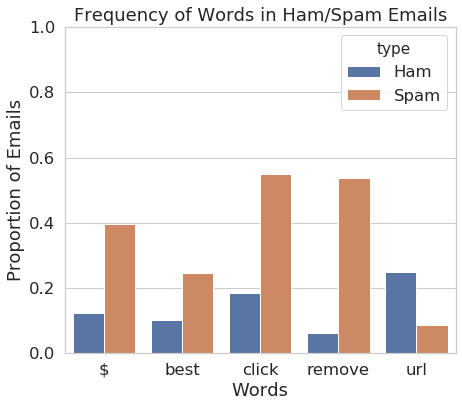

In [ ]:
train=train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts

ward = ['remove', 'best', 'url', '$', 'click']
intexts = words_in_texts(ward, train['email'])

dataf = pd.DataFrame(
    intexts, columns=ward
)
dataf['type'] = train['spam']


hams = dataf.query('type==0')
spams = dataf.query('type==1')

dataf = dataf.melt('type')

#hamprop = [np.mean(hams[y]) for y in ward]
#spamprop = [np.mean(spams[y]) for y in ward]


dataf = dataf.groupby(['type', 'variable']).mean().reset_index()
dataf = dataf.replace({0: 'Ham', 1: 'Spam'})

plt.figure(figsize=[7, 6])
plt.title('Frequency of Words in Ham/Spam Emails')
sns.barplot(data = dataf, x = 'variable', y = 'value', hue='type')
plt.ylim(0, 1)

plt.xlabel('Words')
plt.ylabel('Proportion of Emails')


<!-- END QUESTION -->



When the feature is binary, it makes sense to compare its proportions across classes (as in the previous question). Otherwise, if the feature can take on numeric values, we can compare the distributions of these values for different classes.

![training conditional densities](./images/training_conditional_densities.png "Class Conditional Densities")


<!-- BEGIN QUESTION -->

### Question 3b

We create a *class conditional density plot* comparing the distribution of the length of spam emails to the distribution of the length of ham emails in the training set.
<!--
BEGIN QUESTION
name: q3b
manual: True
format: image
points: 2
-->

In [ ]:
train

,id,subject,email,spam
0,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",0
1,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,0
2,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",0
3,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,0
4,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,0
...,...,...,...,...
7508,5734,Subject: [Spambayes] understanding high false ...,">>>>> ""tp"" == tim peters <tim.one@comcast.net>...",0
7509,5191,Subject: Reach millions on the internet!!\n,"\n dear consumers, increase your business sale...",1
7510,5390,Subject: Facts about sex.\n,\n forwarded-by: flower\n \n did you know that...,0
7511,860,Subject: Re: Zoot apt/openssh & new DVD playin...,"on tue, oct 08, 2002 at 04:36:13pm +0200, matt...",0


Text(0, 0.5, 'Distribution')

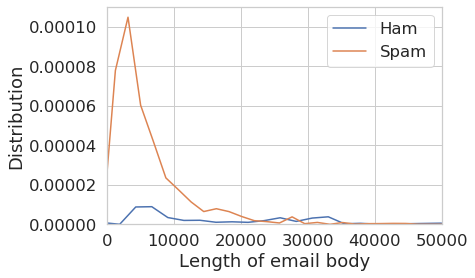

In [ ]:
classcon = train.replace({0: 'ham', 1: 'spam'})#.groupby('spam').apply(len())['email']
classcon['charcount'] = [len(i) for i in classcon['email']]
#classcon = classcon.groupby(['spam', 'charcount']).reset_index()
#classcon
sns.distplot(classcon.loc[classcon['spam'] != 'spam']['charcount'], hist=False, label='Ham')
sns.distplot(classcon.loc[classcon['spam'] == 'spam']['charcount'], hist=False, label='Spam')

plt.xlim(0, 50000)
plt.xlabel('Length of email body')
plt.ylabel('Distribution')

<!-- END QUESTION -->



# Basic Classification

Notice that the output of `words_in_texts(words, train['email'])` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier!

### Question 4

We're given 5 words that might be useful as features to distinguish spam/ham emails. We will use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `Y_train`.

`X_train` should be a matrix of 0s and 1s created by using our `words_in_texts` function on all the emails in the training set.

`Y_train` should be a vector of the correct labels for each email in the training set.

<!--
BEGIN QUESTION
name: q4
points: 2
-->

In [ ]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
Y_train = train['spam']

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), 0    0
 1    0
 2    0
 3    0
 4    0
 Name: spam, dtype: int64)

In [ ]:
grader.check("q4")

All tests passed!

### Question 5

Now that we have matrices, we can use to scikit-learn! Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, we will train a logistic regression model using `X_train` and `Y_train`.

<!--
BEGIN QUESTION
name: q5
points: 2
-->

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True, solver = 'lbfgs')
model = lr.fit(X_train, Y_train)


training_accuracy = np.mean(model.predict(X_train) == Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


In [ ]:
grader.check("q5")

All tests passed!

## Evaluating Classifiers

That doesn't seem too shabby! But the classifier we made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure. Accuracy on the training set doesn't always translate to accuracy in the real world (on the test set). In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

To be clear, we label spam emails as 1 and ham emails as 0. These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of actually spam emails that were correctly flagged as spam.

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`?

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [ ]:
zero_predictor_fp = 0
zero_predictor_fn = sum(Y_train)
print(zero_predictor_fn)

1918


In [ ]:
grader.check("q6a")

All tests passed!

### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set?

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [ ]:
zero_predictor_acc = (0+(len(Y_train)- zero_predictor_fn))/len(Y_train)
zero_predictor_recall = 0
zero_predictor_acc

0.7447091707706642

In [ ]:
grader.check("q6b")

All tests passed!

<!-- BEGIN QUESTION -->

### Question 6c

Brief explanations of the results from 6a and 6b. Why do we observe each of these values (FP, FN, accuracy, recall)?

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->

Since our predictor always predicts 0 regardless, our false positive count is 0 because we aren't even bothering to predict anything as positive in the first place. As a result, our recall, which relies on our true positive count in the numerator, is also 0. Our false negative in this case would simply be the true number of Spam in our training set, which can be expressed as sum(Y_train) since 1's are spam. The accuracy would in this case simply be our true negative count divided by the total length of our data, since we have 0 true positives.

<!-- END QUESTION -->

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Question 5. Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [ ]:
tp = np.sum((model.predict(X_train) == Y_train) & (model.predict(X_train) == 1))
tn = np.sum((model.predict(X_train) == Y_train) & (model.predict(X_train) == 0))
fp = np.sum((model.predict(X_train) == 1) & (model.predict(X_train) != Y_train))
fn = np.sum((model.predict(X_train) == 0) & (model.predict(X_train) != Y_train))
logistic_predictor_precision = tp / (tp + fp)
logistic_predictor_recall = tp / (tp + fn)
logistic_predictor_far = fp / (fp + tn)

print(fp, fn, logistic_predictor_precision , logistic_predictor_recall, logistic_predictor_far, tp, tn)

122 1699 0.6422287390029325 0.11418143899895725 0.021805183199285077 219 5473


In [ ]:
grader.check("q6d")

All tests passed!

<!-- BEGIN QUESTION -->

### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Question 5?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->

The logistic regression classifier provides more false positives than the zero predictor, but also provides less false negatives.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 6f

1. Our logistic regression classifier got 75.6% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features given above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would we prefer for a spam filter and why?

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->

1. This is not too far from our zero predictor accuracy; it differs by around 1%.

2. The given words are very specific and seem to adhere to a niche medical/professional related emails only. As a result, it creates a classifier that may not be strong in predicting whether general emails of any kind are spam or ham.

3. I would honestly prefer the zero predictor over the logistic classifer. In the case of predicting spam emails, I would want to minimize the number of false positives, because this will falsely filter out emails that could be important, making my life harder. Although the zero_predictor allows all emails to pass through as ham, it has 0 false positives whereas the logistic regression classifier has 122, so I would still be receiving all my emails and I could then manually sort it. The accuracy between the two are not too far, suggesting that most emails are ham in the first place anyway.

<!-- END QUESTION -->



# Part II - Moving Forward

With this in mind, it is now our task to make the spam filter more accurate.
Some ideas for improving our model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself.
1. Better data processing. For example, many emails contain HTML as well as text. We can consider extracting out the text from the HTML to help us find better words. Or, we can match HTML tags themselves, or even some combination of the two.
1. Model selection. We can adjust parameters of our model (e.g. the regularization parameter) to achieve higher accuracy. Recall that we should use cross-validation to do feature and model selection properly! Otherwise, we will likely overfit to our training data.

---

<!-- BEGIN QUESTION -->

### Question 7: Feature/Model Selection Process

The process of improving our model:

1. How did we find better features for our model?
2. What did we try that worked / didn't work?
3. What was surprising in our search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->

1. I took the route of honing in on particular, niche words that constitute a spam email. Although it may seem counterintuitive, I began by finding commonly used words in everyday language and conversation, and then finding the highest repeating words in spam emails that are not part of this set.

2. I tried to compare the frequencies and types of punctuation marks as well as small details in the subject line, but these methods proved to be less fruitful than I expected.

3. I was really surprised in finding that once I threw punctuation out of the door when analyzing the email texts, it proved to help a great deal in terms of organization and effectiveness of my classification.

<!-- END QUESTION -->




1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`).
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or we might be able to design a feature that captures all html tags and compare it to these).
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

<!-- BEGIN QUESTION -->

We will generate our visualization in the cell below and provide our description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->

In [ ]:
train
import re

In [ ]:
wordy = ['a', 'an', 'the', 'how', 'i', 'but', 'be', 'can', 'cannot', "can't", 'we', 'you', 'us', 'your', 'me', 'my']
wordy += ['have', 'had', 'which', 'who', 'why', 'with', 'ours', 'yours', 'our', 'he', 'her', 'she', 'him', 'do', "don't", 'to', 'what', 'were']
wordy += ['if', 'is', 'it', 'from', 'had', 'their', 'them', 'where']
#wordy

In [ ]:
classcon['no_pun'] = classcon['email'].str.replace(r'([^\w\s])', ' ')
classcon['word_by_word'] = classcon['no_pun'].str.split()
classcon['word_cont'] = classcon['word_by_word'].apply(lambda z: [i for i in z if i not in wordy])
classcon['word_num'] = classcon['word_by_word'].str.len()
#classcon
spam_stuff = classcon.query("spam=='spam'").word_cont.explode().value_counts()
spords = spam_stuff[:400].index.to_list()
#spords

In [ ]:
X_train_cc = words_in_texts(spords, classcon['word_by_word'])
X_train_cc = np.append(X_train_cc, classcon[['word_num']], axis=1)
X_train_cc = np.append(X_train_cc, classcon[['charcount']], axis = 1)
X_train_cc.astype(int)
X_train_cc

array([[   0,    0,    0, ...,    0,  234, 1641],
       [   0,    0,    0, ...,    0,  789, 4713],
       [   0,    0,    0, ...,    0,  186, 1399],
       ...,
       [   0,    0,    0, ...,    0,  284, 1732],
       [   0,    0,    0, ...,    0,  192, 1098],
       [   0,    0,    0, ...,    0,  136,  812]])

In [ ]:
logr = LogisticRegression(fit_intercept=True, solver = 'lbfgs', max_iter=1000)
nmodel = logr.fit(X_train_cc, Y_train)


training_accuracy = np.mean(nmodel.predict(X_train_cc) == Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9744442965526421


In [ ]:
classcon

,id,subject,email,spam,charcount,no_pun,word_by_word,word_cont,word_num
0,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",ham,1641,while i was playing with the past issues it a...,"[while, i, was, playing, with, the, past, issu...","[while, was, playing, past, issues, annoyed, t...",234
1,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,ham,4713,url http diveintomark org archives 2002 10 ...,"[url, http, diveintomark, org, archives, 2002,...","[url, http, diveintomark, org, archives, 2002,...",789
2,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",ham,1399,no please post a link \n \n fox\n origi...,"[no, please, post, a, link, fox, original, mes...","[no, please, post, link, fox, original, messag...",186
3,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,ham,4435,this article from nytimes com \n has been sent...,"[this, article, from, nytimes, com, has, been,...","[this, article, nytimes, com, has, been, sent,...",719
4,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,ham,32857,html \n head \n title tech update today ti...,"[html, head, title, tech, update, today, title...","[html, head, title, tech, update, today, title...",5216
...,...,...,...,...,...,...,...,...,...
7508,5734,Subject: [Spambayes] understanding high false ...,">>>>> ""tp"" == tim peters <tim.one@comcast.net>...",ham,465,tp tim peters tim one comcast net ...,"[tp, tim, peters, tim, one, comcast, net, writ...","[tp, tim, peters, tim, one, comcast, net, writ...",61
7509,5191,Subject: Reach millions on the internet!!\n,"\n dear consumers, increase your business sale...",spam,7054,\n dear consumers increase your business sale...,"[dear, consumers, increase, your, business, sa...","[dear, consumers, increase, business, sales, b...",1011
7510,5390,Subject: Facts about sex.\n,\n forwarded-by: flower\n \n did you know that...,ham,1732,\n forwarded by flower\n \n did you know that...,"[forwarded, by, flower, did, you, know, that, ...","[forwarded, by, flower, did, know, that, tell,...",284
7511,860,Subject: Re: Zoot apt/openssh & new DVD playin...,"on tue, oct 08, 2002 at 04:36:13pm +0200, matt...",ham,1098,on tue oct 08 2002 at 04 36 13pm 0200 matt...,"[on, tue, oct, 08, 2002, at, 04, 36, 13pm, 020...","[on, tue, oct, 08, 2002, at, 04, 36, 13pm, 020...",192



In the 4 cells below, I used a pairplot to visualize the trends between the character count of the email body,
the word count of the email body, and the 'atypical' word count of the email body as decided by my earlier code.
I supplemented this by plotting the heatmaps for the respective correlations. In doing so, we can see that
although there is generally a strong correlation between word count and atypical word count,
there is less of a correlation between character count and the other two, and the effects are more exaggerated in spam emails.


In [1]:


# code to generate our visualization here:
tab = classcon
tab['atypical_word_count'] = [len(tab['word_cont'][i]) for i in np.arange(len(tab['word_cont']))]

spa = classcon.query("spam=='spam'")
s = spa.iloc[:, [4, 8, 9]].corr()
ha = classcon.query("spam=='ham'")
h = ha.iloc[:, [4, 8, 9]].corr()
sp = spa[['charcount', 'word_num', 'atypical_word_count']]
han = ha[['charcount', 'word_num', 'atypical_word_count']]

#spords[:10]
sns.pairplot(sp)
plt.title("Spam Emails")

#robust=True)
#train=train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts


# hams = dataf.query('type==0')
# spams = dataf.query('type==1')

# dataf = dataf.melt('type')


# dataf = dataf.groupby(['type', 'variable']).mean().reset_index()

#sns.heatmap(dataf)

# plt.figure(figsize=[7, 6])
# plt.title('Frequency of Words in Ham/Spam Emails')
#sns.barplot(data = dataf, x = 'variable', y = 'value', hue='type')
# plt.ylim(0, 1)

# plt.xlabel('Words')
# plt.ylabel('Proportion of Emails')


NameError: name 'classcon' is not defined

Text(0.5, 1, 'Spam Emails')

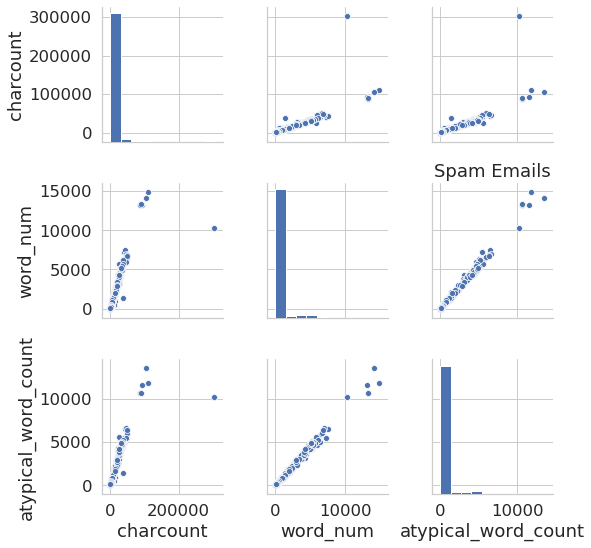

In [ ]:
sns.pairplot(han)
plt.title("Spam Emails")

Text(0.5, 1, 'Ham Emails')

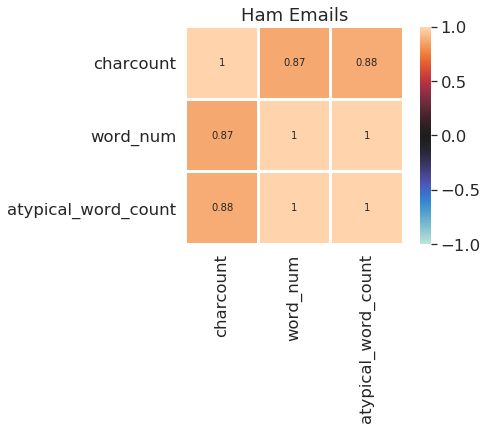

In [ ]:
sns.heatmap(h, vmin=-1, vmax=1, center=0, linewidths = 2, linecolor = 'white', annot = True, square=True)
plt.title('Ham Emails')

Text(0.5, 1, 'Spam Emails')

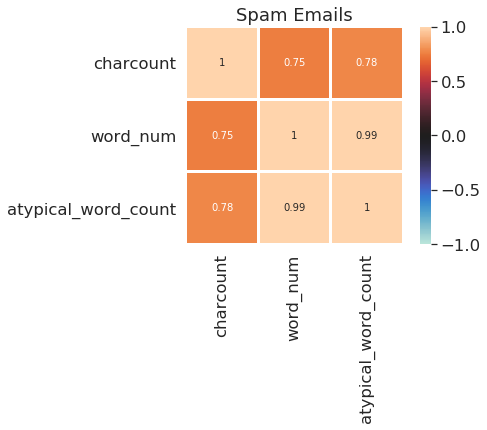

In [ ]:
sns.heatmap(s, vmin=-1, vmax=1, center=0, linewidths = 2, linecolor = 'white', annot = True, square=True)
plt.title('Spam Emails')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 9: ROC Curve

In most cases we won't be able to get no false positives and no false negatives, so we have to compromise. For example, in the case of cancer screenings, false negatives are comparatively worse than false positives — a false negative means that a patient might not discover a disease until it's too late to treat, while a false positive means that a patient will probably have to take another screening.

Logistic regression calculates the probability that an example belongs to a certain class. Then, to classify an example we say that an email is spam if our classifier gives it $\ge 0.5$ probability of being spam. However, *we can adjust that cutoff*: we can say that an email is spam only if our classifier gives it $\ge 0.7$ probability of being spam, for example. This is how we can trade off false positives and false negatives.

The ROC curve shows this trade off for each possible cutoff probability. In the cell below, we plot a ROC curve for our final classifier on the training data.

<!--
BEGIN QUESTION
name: q9
manual: True
points: 3
-->

Text(0.5, 1.0, 'Prediction Model ROC Curve')

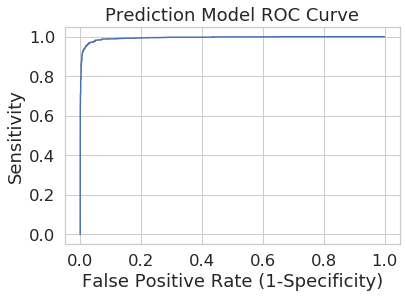

In [ ]:
from sklearn.metrics import roc_curve


X_trainp = nmodel.predict_proba(X_train_cc)[:, 1]
fpr, sensitivity, threshold = roc_curve(Y_train, X_trainp, pos_label=1)
plt.plot(fpr, sensitivity)
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('Prediction Model ROC Curve')

<!-- END QUESTION -->

# Question 10: Test Predictions

The following code will write our predictions on the test dataset to a CSV file.

<!--
BEGIN QUESTION
name: q10
points: 3
-->

In [ ]:
val = val.reset_index(drop=True)
def dataman(df):
    df['charcount'] = [len(i) for i in df['email']]
    df['no_pun'] = df['email'].str.replace(r'([^\w\s])', ' ')
    df['word_by_word'] = df['no_pun'].str.split()
    df['word_cont'] = df['word_by_word'].apply(lambda z: [i for i in z if i not in wordy])
    df['word_num'] = df['word_by_word'].str.len()

dataman(val)

Xval = words_in_texts(spords, val['word_by_word'])
Xval = np.append(Xval, val[['word_num']], axis=1)
Xval = np.append(Xval, val[['charcount']], axis = 1)
Xval.astype(int)

#Xval

Yval = np.array(val['spam'])

In [ ]:
validation_acc = np.mean(Yval == nmodel.predict(Xval))
print(validation_acc)

0.962874251497006


In [ ]:
test = test.fillna('')
test = test.reset_index(drop=True)
dataman(test)
Xtest = words_in_texts(spords, test['word_by_word'])
Xtest = np.append(Xtest, test[['word_num']], axis=1)
Xtest = np.append(Xtest, test[['charcount']], axis = 1)
Xtest.astype(int)
pred = nmodel.predict(Xtest)

In [ ]:
test_predictions = pred
test_predictions

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
grader.check("q10")

All tests passed!

In [ ]:
from datetime import datetime

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'],
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Gradescope for scoring.')

Created a CSV file: submission_2020-08-05T22:41:36.csv.
You may now upload this CSV file to Gradescope for scoring.


---


In [ ]:
grader.check_all()

q10:

    All tests passed!
    

q1a:

    All tests passed!
    

q1b:

    All tests passed!
    

q2:

    All tests passed!
    

q4:

    All tests passed!
    

q5:

    All tests passed!
    

q6a:

    All tests passed!
    

q6b:

    All tests passed!
    

q6d:

    All tests passed!

## Submission


In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()

Thanks for following along my ham/spam classifier project!